# Regression
**Author**: Andrea Cass

## 1. About this notebook
The purpose of this notebook is to run a logistic regression using several variables:

* **Dependent variable**: sentiment (negative/not negative)

* **Main explanatory variable**: inflow (Syrian/Ukrainian)

* **Control**: foreign population size

* **Control**: economic situation

Steps:
1. Remaining data preparations
2. Creation of control variables
3. Regression

## 2. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from pathlib import Path
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression

In [2]:
# find current working directory

os.getcwd()

'/Users/andycass/Jupyterlab_main-folder/THESIS/limited collection/revised/negative binary class'

In [3]:
# changing current working directory

os.chdir('/Users/andycass/Desktop/Thesis_data-and-code')

In [4]:
# naming the current working directory

cwd = Path.cwd()

In [5]:
# naming the CASS_thesis folder

CASS_thesis = cwd / 'CASS_thesis'

In [6]:
# double-checking the CASS_thesis location

CASS_thesis

PosixPath('/Users/andycass/Desktop/Thesis_data-and-code/CASS_thesis')

## 3. Data prep - dropping all cases before inflow
Before adding controls, I need to drop all cases BEFORE the inflow (because my regression only focuses on during inflow--i.e., from the center time-point onwards)

In [7]:
df = pd.read_csv(CASS_thesis / '05_Explored-and-vizualized_limited_merged_binary-CLASS.csv', index_col=[0])

In [8]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False,False,True,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38606,"For day 1 of week 2, @AnnaMariaKonsta discusse...",1.104025e+08,2021-06-28 14:43:31+00:00,en,fcbb3c6e0a7eba22,0.0,1.0,2.0,0.0,0.0,...,0.822089,0.142403,NEUTRAL,0,2021-06-28 14:43:31,False,True,True,False,0
38607,"@ariadneconill Europe is racist, but in a diff...",2.521809e+09,2021-06-27 13:03:29+00:00,en,e385d4d639c6a423,0.0,1.0,6.0,0.0,0.0,...,0.093805,0.012996,NEGATIVE,-1,2021-06-27 13:03:29,False,True,True,False,1
38608,"A labour of love, inspired by Middle-earth.\n\...",5.633818e+08,2021-06-27 08:37:21+00:00,en,257640324f249a73,0.0,1.0,17.0,0.0,0.0,...,0.520120,0.323320,NEUTRAL,0,2021-06-27 08:37:21,False,True,True,False,0
38609,@simongerman600 I must have missed the great f...,2.591892e+09,2021-06-26 08:03:22+00:00,en,000b71538f35fe46,0.0,0.0,1.0,0.0,0.0,...,0.063759,0.023034,NEGATIVE,-1,2021-06-26 08:03:22,False,True,True,False,1


In [9]:
# dropping all cases before inflow
df = df.drop(df[df.before_inflow == True].index)

In [10]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Neutral,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,0.883804,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False,False,True,0
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.583374,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.443080,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.076047,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.275456,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37954,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.261862,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,1
37955,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.191151,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,1
37956,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.347824,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,1
37957,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.287370,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0


In [11]:
# resetting index

df = df.reset_index(drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32522 entries, 0 to 32521
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             32522 non-null  object 
 1   author_id                        32522 non-null  float64
 2   created_at                       32522 non-null  object 
 3   lang                             32522 non-null  object 
 4   geo.place_id                     32199 non-null  object 
 5   public_metrics.retweet_count     32522 non-null  float64
 6   public_metrics.reply_count       32522 non-null  float64
 7   public_metrics.like_count        32522 non-null  float64
 8   public_metrics.quote_count       32522 non-null  float64
 9   public_metrics.impression_count  32522 non-null  float64
 10  geo.coordinates.coordinates      3183 non-null   object 
 11  in_reply_to_user_id              10509 non-null  float64
 12  entities.hashtags 

In [13]:
df.inflow.value_counts()

Syrians       20340
Ukrainians    12182
Name: inflow, dtype: int64

## 4. Economic situation
### 4.1. Unemployment
In this section, I add unemployment data to the existing data frame. Specifically, I will assign all observations published in each year a corresponding yearly unemployment rate, "unemp"

Syrian inflow:
* 2014: **0.067** (6.7%)
* 2015: **0.064** (6.4%)
* 2016: **0.061** (6.1%)

Ukrainian inflow:
* 2021: **0.057** (5.7%)
* 2022: **0.054** (5.4%)

I will also create a variable indicating monthly unemployment rate, "month_unemp".

2015:
* 2015-08: **0.041** (4.1%)
* 2015-09: **0.040** (4.0%)
* 2015-10 **0.041** (4.1%)
* 2015-11 **0.043** (4.3%)
* 2015-12 **0.042** (4.2%)

2016:
* 2016-01: **0.041** (4.1%)
* 2016-02: **0.044** (4.4%)
* 2016-03 **0.043** (4.3%)
* 2016-04: **0.040** (4.0%)

2022:
* 2022-02: **0.032** (3.2%)
* 2022-03: **0.030** (3.0%)
* 2022-04: **0.032** (3.2%)
* 2022-05: **0.029** (2.9%)
* 2022-06: **0.029** (2.9%)
* 2022-07: **0.034** (3.4%)
* 2022-08: **0.031** (3.1%)
* 2022-09: **0.029** (2.9%)
* 2022-10: **0.029** (2.9%)

In [64]:
df.year.value_counts()

2015.0    13274
2022.0    12182
2016.0     7066
Name: year, dtype: int64

In [65]:
# creating "unemp"

df['unemp'] = np.where(df['year'] == 2014, 0.067, 
                      np.where(df['year'] == 2015, 0.064, 
                               np.where(df['year'] == 2016, 0.061,
                                        np.where(df['year'] == 2021, 0.057,
                                                 np.where(df['year'] == 2022, 0.054, np.nan)))))


In [66]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,Positive,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,unemp
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,0.048212,NEUTRAL,0,2016-04-20 22:55:08,False,False,False,True,0,0.061
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0.050595,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0,0.061
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0.253944,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0,0.061
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,0.901351,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0,0.061
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,0.026258,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1,0.061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,0.023505,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,1,0.054
32518,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,0.016544,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,1,0.054
32519,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,0.201696,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,1,0.054
32520,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,0.663483,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0,0.054


In [67]:
# creating "month_unemp"

month_unemp_map = {'2015-08': 0.041, '2015-09': 0.040, '2015-10': 0.041, '2015-11': 0.043, '2015-12': 0.042, '2016-01': 0.041, '2016-02': 0.044, '2016-03': 0.043, '2016-04': 0.040, '2022-02': 0.032, '2022-03': 0.030, '2022-04': 0.032, '2022-05': 0.029, '2022-06': 0.029, '2022-07': 0.034, '2022-08': 0.031, '2022-09': 0.029, '2022-10': 0.029}

df['month_unemp'] = df['year-month'].map(month_unemp_map)

In [68]:
df.month_unemp.value_counts()

0.041    6439
0.040    5643
0.029    4901
0.043    4315
0.030    3116
0.044    2217
0.032    2162
0.042    1726
0.031    1002
0.034    1001
Name: month_unemp, dtype: int64

In [69]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,CLASS,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,unemp,month_unemp
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2016-04-20 22:55:08,False,False,False,True,0,0.061,0.040
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2016-04-20 21:27:37,False,False,False,True,0,0.061,0.040
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,NEUTRAL,0,2016-04-20 21:18:58,False,False,False,True,0,0.061,0.040
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,POSITIVE,1,2016-04-20 18:25:11,False,False,False,True,0,0.061,0.040
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,NEGATIVE,-1,2016-04-20 16:27:28,False,False,False,True,1,0.061,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 07:11:54,False,False,False,True,1,0.054,0.032
32518,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 07:10:12,False,False,False,True,1,0.054,0.032
32519,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,NEGATIVE,-1,2022-02-24 06:05:46,False,False,False,True,1,0.054,0.032
32520,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,POSITIVE,1,2022-02-24 05:40:50,False,False,False,True,0,0.054,0.032


### 4.2 GDP 
#### 4.2.1. GDP volume growth

In this section, I add GDP to the existing data frame. This data is taken from OECD Statistics on **GDP volume growth**.

* 2015: 1.24%
* 2016: 2.14%
* 2022: 1.77%

In [70]:
# creating "GDP_vol"

GDP_vol_map = {2015: 1.24, 2016: 2.14, 2022: 1.77}

df['GDP_vol'] = df['year'].map(GDP_vol_map)

In [71]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,num_CLASS,date_time,before_syrian_inflow,before_ukrainian_inflow,before_inflow,during_inflow,CLASS_bin,unemp,month_unemp,GDP_vol
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,0,2016-04-20 22:55:08,False,False,False,True,0,0.061,0.040,2.14
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,0,2016-04-20 21:27:37,False,False,False,True,0,0.061,0.040,2.14
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,0,2016-04-20 21:18:58,False,False,False,True,0,0.061,0.040,2.14
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,1,2016-04-20 18:25:11,False,False,False,True,0,0.061,0.040,2.14
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,-1,2016-04-20 16:27:28,False,False,False,True,1,0.061,0.040,2.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,-1,2022-02-24 07:11:54,False,False,False,True,1,0.054,0.032,1.77
32518,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,-1,2022-02-24 07:10:12,False,False,False,True,1,0.054,0.032,1.77
32519,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,-1,2022-02-24 06:05:46,False,False,False,True,1,0.054,0.032,1.77
32520,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,1,2022-02-24 05:40:50,False,False,False,True,0,0.054,0.032,1.77


#### 4.2.2. GDP volume, market prices

* 2015: 3,023,456,440,000
* 2016: 3,088,292,290,000
* 2022: 3,252,251,278,688.25

In [72]:
# creating "GDP_nom"

GDP_nom_map = {2015: 3023456440000, 2016: 3088292290000, 2022: 3252251278688.25}

df['GDP_nom'] = df['year'].map(GDP_nom_map)

#### 5.2.2. Net disposable income of households & non-profits serving households

* 2015: 1,724,533,000,000
* 2016: 1,784,884,000,000
* 2022: 2,134,895,916,416.89

In [73]:
# creating "net_disp"

net_disp_map = {2015: 1724533000000, 2016: 1784884000000, 2022: 2134895916416.89}

df['net_disp'] = df['year'].map(net_disp_map)

## 5. Foreign population size

In this section, I add several variables to the dataframe:
* foreign_arrivals: number of yearly foreign arrivals
* foreign_share: yearly foreign share of population
* change_foreign_share: change in yearly foreign share of population from previous year

In [74]:
# calculating yearly foreign arrivals by adding monthly totals

print(99093 + 112036 + 548320 + 303528 + 218366 + 167121 + 166599 + 194849 + 197346 + 190158 + 156928 + 133016)

2487360


### 5.1 Foreign arrivals

* 2015: 2,016,241
* 2016: 1,719,075
* 2022: 2,487,360

In [75]:
# creating "foreign_arrivals"

foreign_arrivals_map = {2015: 2016241, 2016: 1719075, 2022: 2487360}

df['foreign_arrivals'] = df['year'].map(foreign_arrivals_map)

### 5.2 Foreign share of population
I define inflow size, here, as foreign share of total population. Therefore, I divide yearly foreign arrivals by yearly total population. This data is retrieved from Genesis Destatis table 12411-0001 and https://www.destatis.de/EN/Press/2023/01/PE23_026_124.html

* 2015: 2,016,241 / 82,175,684 = 0.0245 --> 2.45%
* 2016: 1,719,075 / 82,521,653 = 0.0208 --> 2.08%
* 2022: 2,487,360, / 84,300,000 = 0.0295 --> 2.95% 

In [76]:
# creating "foreign_share"

foreign_share_map = {2015: 2.45, 2016: 2.08, 2022: 2.95}

df['foreign_share'] = df['year'].map(foreign_share_map)

In [77]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,before_inflow,during_inflow,CLASS_bin,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,False,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,False,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,False,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,False,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,False,True,1,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,False,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
32518,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,False,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
32519,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,False,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95
32520,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,False,True,0,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95


### 5.3 Change in foreign share of population

I calculate change in foreign share of population by subtracting the previous year from the current year.

* 2015 (change from 2014): 0.0245 - 0.0165 = 0.008 --> 0.8%
* 2016 (change from 2015): 0.0209 - 0.0245 = -0.0037 --> -0.37%
* 2022 (change from 2021): 0.0295 - 0.0137 = 0.0158 --> 1.58%

In [78]:
# creating "change_foreign_share"

change_foreign_share_map = {2015: 0.8, 2016: -0.37, 2022: 1.58}

df['change_foreign_share'] = df['year'].map(change_foreign_share_map)

In [79]:
df

,text,author_id,created_at,lang,geo.place_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,public_metrics.impression_count,...,during_inflow,CLASS_bin,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
0,"Syrisch-orthodoxer Bischof: ""Was im Nahen Oste...",4.122038e+09,2016-04-20 22:55:08+00:00,de,06d9a7c249c59bcd,0.0,0.0,0.0,0.0,0.0,...,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
1,"Habe schon lang nicht gehört, daß Flüchtling G...",1.179544e+09,2016-04-20 21:27:37+00:00,de,e99b714fe65be4fb,0.0,0.0,0.0,0.0,0.0,...,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
2,"""Es kommen kaum noch Flüchtlinge nach Griechen...",2.246076e+08,2016-04-20 21:18:58+00:00,de,3078869807f9dd36,0.0,0.0,0.0,0.0,0.0,...,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
3,Unsere 1. Kochshow für #Flüchtlinge. Super spi...,2.480764e+09,2016-04-20 18:25:11+00:00,de,8abc99434d4f5d28,0.0,0.0,4.0,0.0,0.0,...,True,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
4,500 tote #Flüchtlinge im #Mittelmeer – Tragödi...,6.062653e+08,2016-04-20 16:27:28+00:00,de,e11a8b8e3771f9fa,0.0,1.0,0.0,0.0,0.0,...,True,1,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,Airstrike on Ukrainian military base north of ...,1.975981e+07,2022-02-24 07:11:54+00:00,en,3078869807f9dd36,9.0,1.0,24.0,0.0,0.0,...,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32518,Casualties in a Ukrainian city Uman || #Ukrai...,1.388233e+08,2022-02-24 07:10:12+00:00,en,cc5401f65b0ddc7b,1.0,0.0,3.0,0.0,0.0,...,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32519,"Fuck, my day starts with writing an email invi...",2.626915e+08,2022-02-24 06:05:46+00:00,en,b46630d5c0cc20a7,0.0,0.0,2.0,0.0,0.0,...,True,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32520,Solidarity with Ukraine: The Brandenburg Gate ...,4.829567e+07,2022-02-24 05:40:50+00:00,en,37439688c6302728,10.0,2.0,45.0,1.0,0.0,...,True,0,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58


## 6. Selection of controls
In order to choose a control for foreing population size and a control for economic situation, multicollinearity is assessed. Additionally, inflow and CLASS (the main explanatory variable and dependent variable) are converted to dummies--the form they take in the regression.

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32522 entries, 0 to 32521
Data columns (total 42 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             32522 non-null  object 
 1   author_id                        32522 non-null  float64
 2   created_at                       32522 non-null  object 
 3   lang                             32522 non-null  object 
 4   geo.place_id                     32199 non-null  object 
 5   public_metrics.retweet_count     32522 non-null  float64
 6   public_metrics.reply_count       32522 non-null  float64
 7   public_metrics.like_count        32522 non-null  float64
 8   public_metrics.quote_count       32522 non-null  float64
 9   public_metrics.impression_count  32522 non-null  float64
 10  geo.coordinates.coordinates      3183 non-null   object 
 11  in_reply_to_user_id              10509 non-null  float64
 12  entities.hashtags 

In [81]:
df.inflow.value_counts()

Syrians       20340
Ukrainians    12182
Name: inflow, dtype: int64

In [82]:
# creating 'inflow' dummy variable and keeping the original 'inflow' column

df = df.assign(inflow_Ukrainians=(df['inflow'] == 'Ukrainians').astype(int),
               inflow_Syrians=(df['inflow'] == 'Syrians').astype(int))

In [83]:
df.inflow_Syrians.value_counts()

1    20340
0    12182
Name: inflow_Syrians, dtype: int64

In [84]:
df.inflow_Ukrainians.value_counts()

0    20340
1    12182
Name: inflow_Ukrainians, dtype: int64

The value counts match (i.e., there are 12182 counts of Ukrainians for inflow and 12182 counts of 1 for inflow_Ukrainians; there are 20340 counts of Syrians for inflow and 20340 counts of 1 for inflow_Syrians)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32522 entries, 0 to 32521
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   text                             32522 non-null  object 
 1   author_id                        32522 non-null  float64
 2   created_at                       32522 non-null  object 
 3   lang                             32522 non-null  object 
 4   geo.place_id                     32199 non-null  object 
 5   public_metrics.retweet_count     32522 non-null  float64
 6   public_metrics.reply_count       32522 non-null  float64
 7   public_metrics.like_count        32522 non-null  float64
 8   public_metrics.quote_count       32522 non-null  float64
 9   public_metrics.impression_count  32522 non-null  float64
 10  geo.coordinates.coordinates      3183 non-null   object 
 11  in_reply_to_user_id              10509 non-null  float64
 12  entities.hashtags 

### 6.1. Multicollinearity checks

In [86]:
# creating a smaller dataset with only the variables of interest

df_small = df[['CLASS_bin', 'inflow_Ukrainians', 'unemp', 'month_unemp', 'GDP_vol', 'GDP_nom', 'net_disp', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]

In [87]:
df_small

,CLASS_bin,inflow_Ukrainians,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
0,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
1,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
2,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
3,0,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
4,1,0,0.061,0.040,2.14,3.088292e+12,1.784884e+12,1719075,2.08,-0.37
...,...,...,...,...,...,...,...,...,...,...
32517,1,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32518,1,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32519,1,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58
32520,0,1,0.054,0.032,1.77,3.252251e+12,2.134896e+12,2487360,2.95,1.58


In [88]:
df_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32522 entries, 0 to 32521
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLASS_bin             32522 non-null  int64  
 1   inflow_Ukrainians     32522 non-null  int64  
 2   unemp                 32522 non-null  float64
 3   month_unemp           32522 non-null  float64
 4   GDP_vol               32522 non-null  float64
 5   GDP_nom               32522 non-null  float64
 6   net_disp              32522 non-null  float64
 7   foreign_arrivals      32522 non-null  int64  
 8   foreign_share         32522 non-null  float64
 9   change_foreign_share  32522 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 2.5 MB


#### 6.1.1. Point-Biserial Correlation
To measure the correlation between my binary independent variable, inflow_Ukrainians, and my numeric variables, a point-biserial correlation is used. 

For a point-biserial correlation: 
* -1: perfect negative correlation
* 0: no correlation
* 1: perfect positive correlation

In [89]:
# calculate point-biserial correlation coefficients

for col in df_small.columns:
    if col != 'CLASS_bin' and col != 'inflow_Ukrainians':
        r_pb, p_value = stats.pointbiserialr(df_small[col], df_small['inflow_Ukrainians'])
        print("Point-biserial correlation coefficient between", col, "and inflow_Ukrainians: ", r_pb)
        print("p-value: ", p_value)

Point-biserial correlation coefficient between unemp and inflow_Ukrainians:  -0.9676935982284081
p-value:  0.0
Point-biserial correlation coefficient between month_unemp and inflow_Ukrainians:  -0.9665720126134443
p-value:  0.0
Point-biserial correlation coefficient between GDP_vol and inflow_Ukrainians:  0.29645947927943833
p-value:  0.0
Point-biserial correlation coefficient between GDP_nom and inflow_Ukrainians:  0.9713785094474636
p-value:  0.0
Point-biserial correlation coefficient between net_disp and inflow_Ukrainians:  0.9928091365471222
p-value:  0.0
Point-biserial correlation coefficient between foreign_arrivals and inflow_Ukrainians:  0.9276686803659195
p-value:  0.0
Point-biserial correlation coefficient between foreign_share and inflow_Ukrainians:  0.9091896444415435
p-value:  0.0
Point-biserial correlation coefficient between change_foreign_share and inflow_Ukrainians:  0.7934064372696092
p-value:  0.0


#### Interpretation/Remarks

Regarding the economic variables:
* GDP_vol seems to pose the least problem, with a correlation of 0.2964

Regarding the foreign size variables:
* change_foreign_share seems to post the least problem, with a correlation of 0.793

#### 6.1.2. Pairwise Correlation

To measure the correlation between my numeric variables, pairwise correlation is used.

In [90]:
# creating a smaller dataset with only the numeric variables of interest

df_small_num = df[['unemp', 'month_unemp', 'GDP_vol', 'GDP_nom', 'net_disp', 'foreign_arrivals', 'foreign_share', 'change_foreign_share']]

In [91]:
# correlation matrix

df_small_num.corr()

,unemp,month_unemp,GDP_vol,GDP_nom,net_disp,foreign_arrivals,foreign_share,change_foreign_share
unemp,1.000000,0.915539,-0.527677,-0.999887,-0.990917,-0.803553,-0.774835,-0.614305
month_unemp,0.915539,1.000000,-0.211522,-0.920247,-0.950217,-0.925993,-0.911508,-0.814702
GDP_vol,-0.527677,-0.211522,1.000000,0.514833,0.408654,-0.081602,-0.128126,-0.346116
GDP_nom,-0.999887,-0.920247,0.514833,1.000000,0.992829,0.812420,0.784261,0.626111
net_disp,-0.990917,-0.950217,0.408654,0.992829,1.000000,0.876298,0.852807,0.714836
foreign_arrivals,-0.803553,-0.925993,-0.081602,0.812420,0.876298,1.000000,0.998906,0.963307
foreign_share,-0.774835,-0.911508,-0.128126,0.784261,0.852807,0.998906,1.000000,0.974806
change_foreign_share,-0.614305,-0.814702,-0.346116,0.626111,0.714836,0.963307,0.974806,1.000000


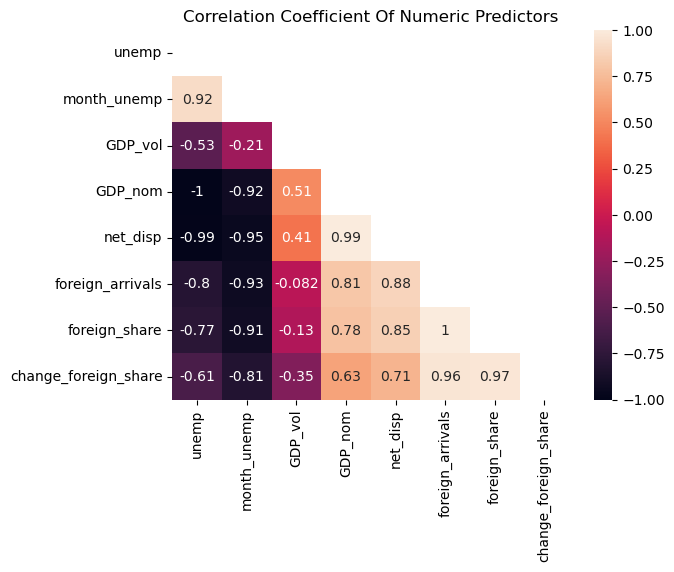

In [92]:
# correlation matrix heatmap

mask = np.triu(np.ones_like(df_small_num.corr(), dtype=bool))

sns.heatmap(df_small_num.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Numeric Predictors')
plt.show()

##### Interpretation/Remarks

The correlation between GDP_vol and change_foreign_share is -0.35, indiciating they, alone, will not pose a multicollinearity problem. Therefore, they seem to be the appropriate controls.

### 6.2. Descriptives
Now that the control variables are selected, descriptive statistics are found.

#### 6.2.1. Foreign share

In [93]:
# calculating the mean and standard deviation of "change_foreign_share" for each category of "inflow"
agg_change_foreign_share_by_inflow = df.groupby('inflow')['change_foreign_share'].agg(['mean', 'std'])

# print the mean and standard deviation
print(agg_change_foreign_share_by_inflow)

                mean     std
inflow                      
Syrians     0.393549  0.5571
Ukrainians  1.580000  0.0000


#### 6.2.2. GDP volume growth

In [94]:
# calculate the mean and standard deviation of "foreign_share" for each category of "inflow"
agg_GDP_vol_by_inflow = df.groupby('inflow')['GDP_vol'].agg(['mean', 'std'])

# print the resulting DataFrame with the mean and standard deviation
print(agg_GDP_vol_by_inflow)

                mean       std
inflow                        
Syrians     1.552655  0.428539
Ukrainians  1.770000  0.000000


## 7. Regression

### Model 1
This model only contains the dependent variable and main explanatory variable

In [97]:
# defining the variables

y = df['CLASS_bin']

X = df['inflow_Ukrainians']

# adding a constant

X = sm.add_constant(X)

In [98]:
# running regression

model1 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.659500
         Iterations 4


In [99]:
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32520
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                 0.04412
Time:                        16:24:37   Log-Likelihood:                -21448.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5533      0.015    -37.994      0.000      -0.582      -0.525
inflow_Ukrainians     1.0360      0.024     43.780      0.000       0.990       1.082


In [100]:
# finding odds ratios

model1_odds = pd.DataFrame(np.exp(model1.params), columns=['OR'])
model1_odds['standard error'] = model1.bse
model1_odds['z-value'] = model1.params / model1.bse  # calculate z-values
model1_odds['p-value']=model1.pvalues
model1_odds[['2.5%', '97.5%']] = np.exp(model1.conf_int())

model1_odds

,OR,standard error,z-value,p-value,2.5%,97.5%
const,0.575035,0.014564,-37.993771,0.0,0.558853,0.591685
inflow_Ukrainians,2.817827,0.023663,43.779635,0.0,2.690123,2.951593


### Model 2

This model contains the dependent variable and one control: change in foreign share

In [101]:
# defining the variables

y = df['CLASS_bin']

X = df['change_foreign_share']

# adding a constant

X = sm.add_constant(X)

In [102]:
# running regression

model2 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.674421
         Iterations 4


In [103]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32520
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                 0.02249
Time:                        16:25:41   Log-Likelihood:                -21934.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                1.686e-221
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5866      0.018    -32.619      0.000      -0.622      -0.551
change_foreign_share     0.4996      0.016     31.140      0.000       0.468       0.531


In [104]:
# finding odds ratios

model2_odds = pd.DataFrame(np.exp(model2.params), columns=['OR'])
model2_odds['z-value'] = model2.params / model2.bse  # calculate z-values
model2_odds['p-value']=model2.pvalues
model2_odds[['2.5%', '97.5%']] = np.exp(model2.conf_int())

model2_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.556208,-32.618596,2.235137e-233,0.536945,0.576163
change_foreign_share,1.648097,31.139789,6.973211e-213,1.597077,1.700748


### Model 3

This model contains the dependent variable and one control: GDP volume growth

In [105]:
# defining the variables

y = df['CLASS_bin']

X = df['GDP_vol']

# adding a constant

X = sm.add_constant(X)

In [106]:
# running regression

model3 = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.684409
         Iterations 4


In [107]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32520
Method:                           MLE   Df Model:                            1
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                0.008014
Time:                        16:26:33   Log-Likelihood:                -22258.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                 3.358e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1375      0.053    -21.458      0.000      -1.241      -1.034
GDP_vol        0.5969      0.032     18.888      0.000       0.535       0.659


In [108]:
# finding odds ratios

model3_odds = pd.DataFrame(np.exp(model3.params), columns=['OR'])
model3_odds['z-value'] = model3.params / model3.bse  # calculate z-values
model3_odds['p-value']=model3.pvalues
model3_odds[['2.5%', '97.5%']] = np.exp(model3.conf_int())

model3_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.32061,-21.458405,3.811556e-102,0.288971,0.355714
GDP_vol,1.81642,18.887771,1.437911e-79,1.707331,1.932480


### Model 4
This model contains the dependent variable, main explanatory variable, and one control: change in foreign share of population

In [109]:
# defining the variables

y = df['CLASS_bin']

X2 = df[['inflow_Ukrainians', 'change_foreign_share']]

# adding a constant

X2 = sm.add_constant(X2)

In [110]:
# running regression

model4 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.658897
         Iterations 4


In [111]:
print(model4.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32519
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                 0.04499
Time:                        16:27:17   Log-Likelihood:                -21429.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4903      0.018    -27.835      0.000      -0.525      -0.456
inflow_Ukrainians        1.2305      0.039     31.441      0.000       1.154       1.307
change_forei

In [112]:
# finding odds ratios

model4_odds = pd.DataFrame(np.exp(model4.params), columns=['OR'])
model4_odds['z-value'] = model4.params / model4.bse  # calculate z-values
model4_odds['p-value']=model4.pvalues
model4_odds[['2.5%', '97.5%']] = np.exp(model4.conf_int())

model4_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.612471,-27.834761,1.647310e-170,0.591689,0.633984
inflow_Ukrainians,3.422778,31.441260,5.526942e-217,3.170056,3.695647
change_foreign_share,0.849581,-6.274470,3.508279e-10,0.807404,0.893963


### Model 5
This model contains the dependent variable, main explanatory variable, and one control: GDP volume growth

In [114]:
# defining the variables

y = df['CLASS_bin']

X2 = df[['inflow_Ukrainians', 'GDP_vol']]

# adding a constant

X2 = sm.add_constant(X2)

In [115]:
# running regression

model5 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.658897
         Iterations 4


In [116]:
print(model5.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32519
Method:                           MLE   Df Model:                            2
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                 0.04499
Time:                        16:28:08   Log-Likelihood:                -21429.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.8834      0.055    -16.134      0.000      -0.991      -0.776
inflow_Ukrainians     0.9910      0.025     40.145      0.000       0.943       1.039
GDP_vol               0.

In [117]:
# finding odds ratios

model5_odds = pd.DataFrame(np.exp(model5.params), columns=['OR'])
model5_odds['z-value'] = model5.params / model5.bse  # calculate z-values
model5_odds['p-value']=model5.pvalues
model5_odds[['2.5%', '97.5%']] = np.exp(model5.conf_int())

model5_odds

,OR,z-value,p-value,2.5%,97.5%
const,0.413360,-16.134205,1.466849e-58,0.371296,0.460189
inflow_Ukrainians,2.693896,40.144640,0.000000e+00,2.566661,2.827438
GDP_vol,1.236043,6.274470,3.508279e-10,1.156871,1.320633


### Model 6
This model contains the dependent variable, main explanatory variable, and both controls

In [119]:
# defining the variables

y = df['CLASS_bin']

X2 = df[['inflow_Ukrainians', 'GDP_vol', 'change_foreign_share']]

# adding a constant

X2 = sm.add_constant(X2)

In [122]:
# running regression

model6 = sm.Logit(y, X2).fit()

Optimization terminated successfully.
         Current function value: 0.658897
         Iterations 16


In [123]:
print(model6.summary())

                           Logit Regression Results                           
Dep. Variable:              CLASS_bin   No. Observations:                32522
Model:                          Logit   Df Residuals:                    32518
Method:                           MLE   Df Model:                            3
Date:                Tue, 25 Apr 2023   Pseudo R-squ.:                 0.04499
Time:                        16:29:42   Log-Likelihood:                -21429.
converged:                       True   LL-Null:                       -22438.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6685   1.77e+05  -3.77e-06      1.000   -3.47e+05    3.47e+05
inflow_Ukrainians        1.1219   1.08e+05   1.04e-05      1.000   -2.11e+05    2.11e+05
GDP_vol     

In [124]:
# finding odds ratios

model6_odds = pd.DataFrame(np.exp(model6.params), columns=['OR'])
model6_odds['z-value'] = model6.params / model6.bse  # calculate z-values
model6_odds['p-value']=model6.pvalues
model6_odds[['2.5%', '97.5%']] = np.exp(model6.conf_int())

model6_odds

/Users/andycass/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


,OR,z-value,p-value,2.5%,97.5%
const,0.512495,-0.000004,0.999997,0.0,inf
inflow_Ukrainians,3.070727,0.000010,0.999992,0.0,inf
GDP_vol,1.100816,0.000001,0.999999,0.0,inf
change_foreign_share,0.914730,-0.000001,0.999999,0.0,inf


In [125]:
df.to_csv(CASS_thesis / "06_For-regression_limited_merged.csv")